# Introduction to Pandas for Finance

This notebook covers essential Pandas functions for finance, including data loading, exploration, manipulation, and visualization. By the end, you’ll have hands-on experience in using Pandas to analyze and handle financial datasets.


## 1. Importing Libraries and Loading Financial Data
We'll start by importing Pandas and other libraries and then load a sample dataset, such as stock prices, to practice various Pandas functions.


Text(0.5, 1.0, 'Simulated Asset Prices')

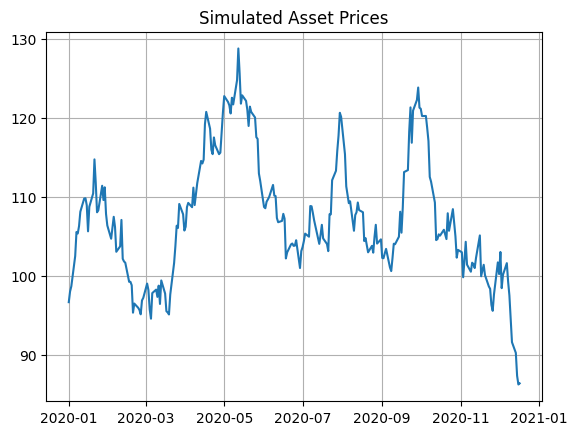

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading sample financial data (can replace with any financial dataset)
# For demonstration, using a generated random price dataset


# parameters
mu = 0.1
sigma = 0.3
T = 1
N = 252
dt = T/N

# price data simulation according to BSM formula
W = np.cumsum(np.random.randn(N)) 
S = 100 * np.exp(mu*dt + sigma * np.sqrt(dt) * W)


dates = pd.date_range(start="2020-01-01", periods=252, freq="B")
df = pd.DataFrame({'Date': dates, 'Price': S})
df.set_index('Date', inplace=True)

# plot
plt.plot(dates, S)
plt.grid(True)
plt.title("Simulated Asset Prices")


## 2. Exploring Financial Data
In this section, we'll explore our data, including inspecting the first few rows, checking for missing values, and viewing basic statistics.


In [89]:
# View the first few rows
print("View first few rows")
print(df.head().to_markdown())

# Summary statistics
print("\n")
print("Summary statistics: ")
print(df.describe().to_markdown())

# Check for missing values
print("\n")
print("Check for missing values (Problem if different from 0)")
print(df.isnull().sum())


View first few rows
| Date                |    Price |
|:--------------------|---------:|
| 2020-01-01 00:00:00 |  97.8362 |
| 2020-01-02 00:00:00 |  96.9559 |
| 2020-01-03 00:00:00 | 100.152  |
| 2020-01-06 00:00:00 | 100.187  |
| 2020-01-07 00:00:00 |  98.6456 |


Summary statistics: 
|       |    Price |
|:------|---------:|
| count | 252      |
| mean  | 106.815  |
| std   |  11.7754 |
| min   |  88.8695 |
| 25%   |  96.752  |
| 50%   | 105.862  |
| 75%   | 115.963  |
| max   | 131.501  |


Check for missing values (Problem if different from 0)
Price    0
dtype: int64


## 3. Data Manipulation
Pandas provides powerful methods to manipulate and transform data. Here, we'll learn some common techniques for finance, like calculating returns and creating moving averages.


In [98]:
# Calculate daily returns
df['Daily_Return'] = df['Price'].pct_change()
df.head()


,Price,Daily_Return
Date,,
2020-01-01,96.695866,NaN
2020-01-02,98.039859,0.013899
2020-01-03,98.713209,0.006868
2020-01-06,102.525236,0.038617
2020-01-07,105.572013,0.029717


Text(0.5, 1.0, 'Price with Moving Averages')

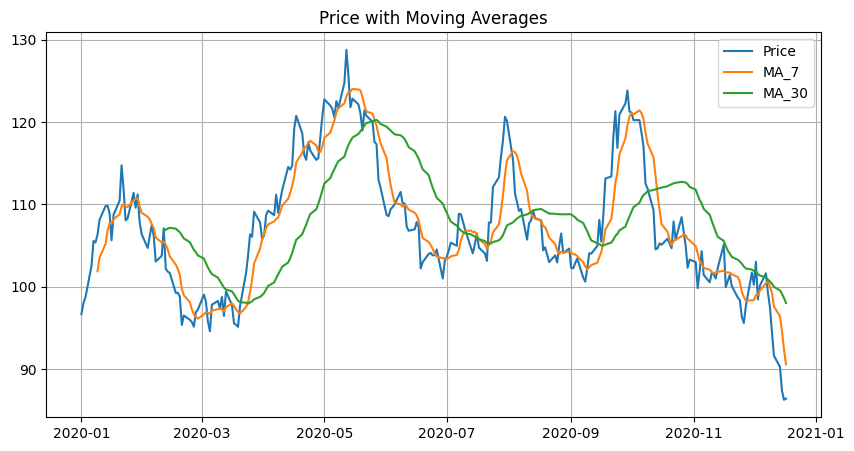

In [99]:
# Calculate moving averages (e.g., 7-day and 30-day moving averages)
df['MA_7'] = df['Price'].rolling(window=7).mean()
df['MA_30'] = df['Price'].rolling(window=30).mean()


# plot using matplotlib
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.dpi = 100

ax.plot(df.index, df["Price"], label="Price")
ax.plot(df.index, df["MA_7"], label="MA_7")
ax.plot(df.index, df["MA_30"], label="MA_30")

ax.grid(True)
ax.legend()
ax.set_title("Price with Moving Averages")



## 4. Handling Missing Data
Financial datasets often contain missing values. Pandas has methods for handling them, like filling or dropping missing values.


In [66]:
# Introduce some NaN values for demonstration
df.loc[df.index[5:10], "Price"] = np.nan

# Filling missing values (e.g., forward fill)
df['Price_filled'] = df['Price'].fillna(method='ffill')
df[["Price", "Price_filled"]].head(15)


C:\Users\Utente\AppData\Local\Temp\ipykernel_31912\732037212.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Price_filled'] = df['Price'].fillna(method='ffill')


,Price,Price_filled
Date,,
2020-01-01,101.835323,101.835323
2020-01-02,103.288886,103.288886
2020-01-03,104.051444,104.051444
2020-01-06,105.496878,105.496878
2020-01-07,107.329249,107.329249
2020-01-08,NaN,107.329249
2020-01-09,NaN,107.329249
2020-01-10,NaN,107.329249
2020-01-13,NaN,107.329249


## 5. Time Series Resampling
In finance, resampling time series data (e.g., converting daily data to monthly data) is common. Here, we’ll resample our data to monthly frequency.


In [67]:
# Resample to monthly data and calculate the mean
df_monthly = df.resample('M').mean()
df_monthly.head()


,Price,Daily_Return,MA_7,MA_30,Price_filled
Date,,,,,
2020-01-31,110.855780,0.005661,110.805737,NaN,110.089143
2020-02-29,118.075236,-0.000359,118.228720,115.372103,118.075236
2020-03-31,118.133212,0.005638,116.720295,117.170015,118.133212
2020-04-30,129.449807,-0.003439,129.396160,123.092569,129.449807
2020-05-31,107.084396,-0.007195,110.328099,121.557563,107.084396


## 6. Applying Financial Calculations
Let’s apply some specific financial calculations, such as cumulative returns and volatility.


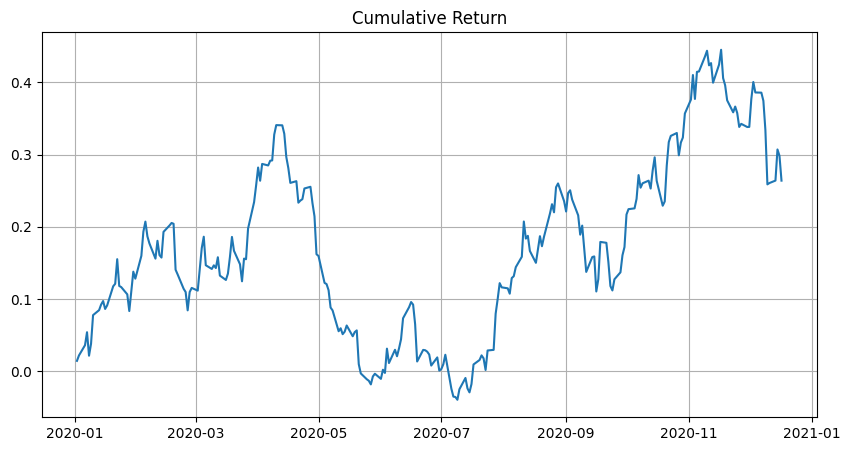

In [70]:
# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1

fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.dpi = 100

ax.plot(df.index, df.Cumulative_Return)
ax.set_title("Cumulative Return")
ax.grid(True)

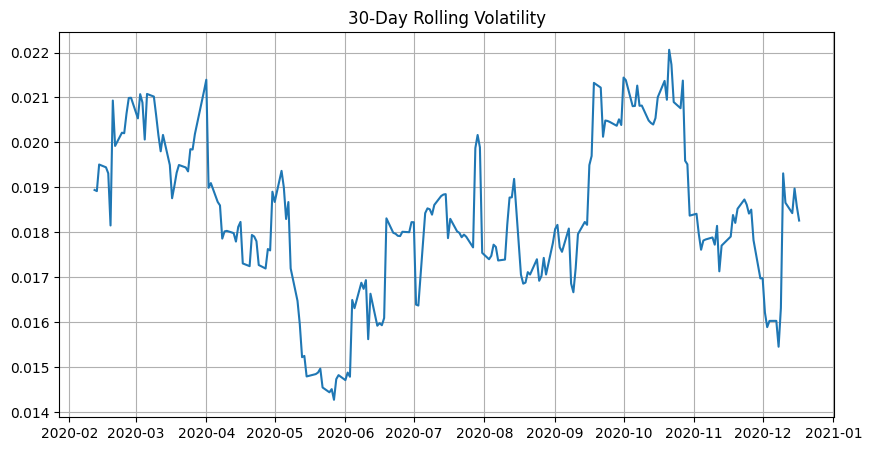

In [74]:
# Calculate rolling volatility (30-day)
df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=30).std()

fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.dpi = 100

ax.plot(df.index, df.Rolling_Volatility)
ax.set_title("30-Day Rolling Volatility")
ax.grid(True)


## 7. Merging and Joining Financial Data
Often, multiple financial datasets need to be merged for analysis. Pandas makes it easy to join data from different sources.


In [85]:
# Simulate an additional dataset (e.g., volume data)
volume = np.random.randint(100, 1000, size=len(dates))
df_volume = pd.DataFrame({'Date': dates, 'Volume': volume})
df_volume.set_index('Date', inplace=True)

# Join with price data
# df = df.join(df_volume, how='left')
# df.head()

# alternatively

df = pd.concat([df, df_volume], axis=1)
print(df_volume.head().to_markdown(), "\n\n" ,df.head().to_markdown())

| Date                |   Volume |
|:--------------------|---------:|
| 2020-01-01 00:00:00 |      624 |
| 2020-01-02 00:00:00 |      577 |
| 2020-01-03 00:00:00 |      653 |
| 2020-01-06 00:00:00 |      681 |
| 2020-01-07 00:00:00 |      437 | 

 | Date                |   Price |   Volume |
|:--------------------|--------:|---------:|
| 2020-01-01 00:00:00 | 96.9059 |      624 |
| 2020-01-02 00:00:00 | 93.6252 |      577 |
| 2020-01-03 00:00:00 | 93.8902 |      653 |
| 2020-01-06 00:00:00 | 95.2356 |      681 |
| 2020-01-07 00:00:00 | 97.646  |      437 |


## 8. Grouping and Aggregating Financial Data
Financial data analysis often requires data to be grouped by categories or time periods. Here, we'll practice some grouping and aggregation functions.


In [86]:
# Group by year and calculate mean price
df['Year'] = df.index.year
df.groupby('Year')['Price'].mean()


Year
2020    106.991755
Name: Price, dtype: float64

## Conclusion
This tutorial introduced the basics of Pandas for financial data analysis. From data loading and cleaning to financial calculations and visualization, these skills are fundamental for quantitative finance.

### Further Resources
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
- *Python for Data Analysis* by Wes McKinney
- *Python for finance* by Yves Hilpisch
